In [298]:
import math
import cv2
from skimage.filters import gaussian
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu


In [299]:
def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        plt.axis('off')
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

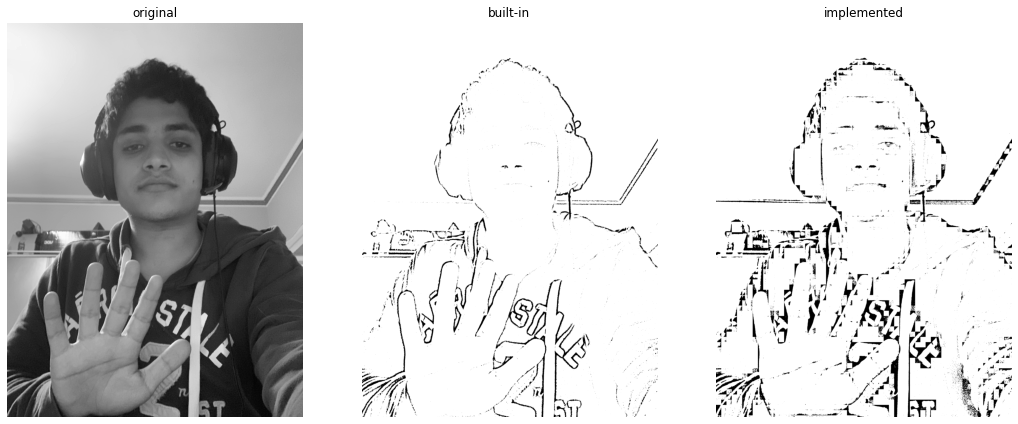

In [301]:
# gaussian = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,59,19)
# gaussian thresholding - binary threshodling
    # param1 : source image (gray)
    # param2 : thresholdValue : ya3ne lama a3ml thresholding el value elly a3la mn el threshold bta3e hatb2a b kam?
    # param3 : neighbourhood size (odd and positive)
    # C : constant to tune the threshold 
# for each neighbourhood : T = guassianMean(neighbourhood) - C

 
def adaptiveGaussianThresholding(img,thresholdValue,kernelSize,C):
    if (kernelSize < 1 or kernelSize %2 !=1):
        print('Kernel size must be odd and postive')
        return
    neighbourhoods = [img[x:x+kernelSize,y:y+kernelSize] for x in range(0,img.shape[0],kernelSize) for y in range(0,img.shape[1],kernelSize)]
    output = np.zeros(img.shape)
    for x in range(0,img.shape[0],kernelSize):
        for y in range(0,img.shape[1],kernelSize):
            n = img[x:x+kernelSize,y:y+kernelSize]
            # show_images([n])   
            gaussianN= gaussian(n,sigma=0.1,mode='constant' ) #,truncate=kernelSize)
            # guassianN = cv2.GaussianBlur(n, (kernelSize, kernelSize), 0, 0)
            gaussianMean = np.mean(gaussianN)
            Cnormalized = C / 255
            T = np.abs(gaussianMean - Cnormalized )
            # print('T',T)
            # print('max',np.max(gaussianN))
            # print('min',np.min(gaussianN))
            
            gaussianN[gaussianN > T] = 1
            gaussianN[gaussianN <= T] = 0
            # print(T)
            # show_images([n,gaussianN])              
            output[x:x+kernelSize,y:y+kernelSize] = gaussianN
    
    return output 




img = cv2.imread('./sharb.jpg', cv2.IMREAD_GRAYSCALE)
g = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,59,19)
g1 = adaptiveGaussianThresholding(img,255,41,19)
threshold = threshold_otsu(img)
binary = img > threshold

show_images([img,g,g1], ['original','built-in','implemented'])